![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [19]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

Mean group by workingday
workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

workingday description
count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64

Correlation between workingday and total
0.011593866091574383

workingday distribution


<AxesSubplot:>

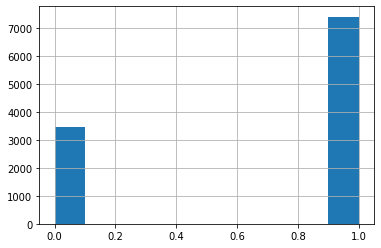

In [15]:
# Celda 1.1

print ("Mean group by workingday")
print(bikes.groupby('workingday').total.mean())
print ("\nworkingday description")
print(bikes.workingday.describe())
print ("\nCorrelation between workingday and total")
print(bikes['workingday'].corr(bikes['total']))
print ("\nworkingday distribution")
bikes['workingday'].hist()

In [24]:
# Celda 1.2
print ("Mean group by hour")
print(bikes.groupby('hour').total.mean())
print ("\nhour description")
print(bikes.hour.describe())
print ("\nCorrelation between hour and total")
print(bikes['hour'].corr(bikes['total']))

Mean group by hour
hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

hour description
count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

Correlation between hour and total
0.40060119414684764


Análisis descriptivo: 

-la cantidad de bicicletas alquiladas es levemente mayor en días laborables, sin embargo hay una correclación bastante baja entre la variable "workingday" y la variable "total"

-la cantidad de bicicletas alquiladas se mantiene por encima de las 150 entre las 7am y 9pm, adicionalmente en las horas pico se presenta mayor uso de éstas, esto a las 8am, 5pm y 6pm.

-hay una correlación baja entre la variable "hour" y la variable "total"

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

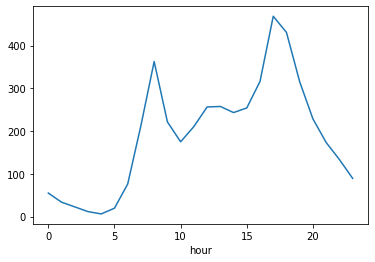

In [25]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

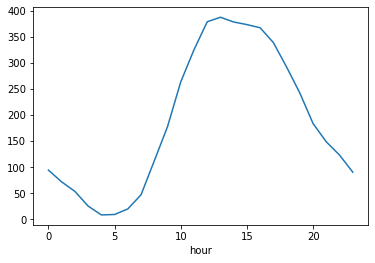

In [26]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday == 0].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

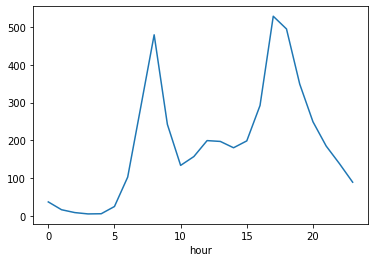

In [29]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday == 1].groupby('hour').total.mean().plot()

Análisis:

-Enn los días no labroables, se puede ver una curva mucho más suavizada alcanzando su pico maximo a medio día, sin embargo en los días laborables se pueden identificar dos picos que coinciden con la entrada y salida del horario de oficina, no cual indica que se estas bicicletas pueden estar siendo usadas principalmente para ir al lugar de trabajo o estudio.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [46]:
# Celda 3
XTotal, yTotal = bikes[["hour","workingday"]], bikes['total']
reg = LinearRegression().fit(XTotal, yTotal)
pred=reg.predict(XTotal)
print(reg.coef_)
mean_squared_error(yTotal, pred)


[10.49206282  4.07248627]


27541.255252498395

Dado que se tienen variables numericas pero representan números discretos, la regresión lineal pierde bastante poder de predicción ya que se tiene una baja cantidad de combinaciones.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [84]:
# Celda 4
max_depth = 20
num_pct = 25
max_features = None
min_gain=1

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

def best_split(XTotal,yTotal,num_pct):

    features = range(XTotal.shape[1])
        
    best_split = [0, 0, 0]  # j, split, mse


    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(XTotal.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            filter_l = XTotal.iloc[:, j] < split
            y_l_mean = yTotal.loc[filter_l].mean()
            y_r_mean = yTotal.loc[~filter_l].mean()
            mse = (mean_squared_error(yTotal, [y_l_mean]*yTotal.shape[0])+mean_squared_error(yTotal, [y_r_mean]*yTotal.shape[0]))/2
            if 0 == best_split[2]:
                best_split = [j, split,mse]
            elif mse < best_split[2]:
                best_split = [j, split,mse]
    return best_split

def tree_grow(XTotal,yTotal, min_gain, max_depth, num_pct, level):
    if XTotal.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0],  level=level, split=-1, n_samples=1, mse=0)
        return tree

    # Calcular la mejor división
    j, split, gain = best_split(XTotal, yTotal, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = yTotal.mean()
    mse=mean_squared_error(yTotal, [y_pred]*yTotal.shape[0])
    tree = dict(y_pred=y_pred,  level=level, split=-1, n_samples=XTotal.shape[0], mse=mse)
    # Revisar el criterio de parada 
    
    if mse > gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = XTotal.iloc[:, j] < split
    X_l, y_l = XTotal.loc[filter_l], yTotal.loc[filter_l]
    X_r, y_r = XTotal.loc[~filter_l], yTotal.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, min_gain, max_depth, num_pct, level + 1)
    tree['sr'] = tree_grow(X_r, y_r, min_gain, max_depth, num_pct, level + 1)
    
    return tree

tree_grow(XTotal,yTotal, min_gain, max_depth, num_pct, 0)


{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [1, 1.0],
 'n_samples': 10886,
 'mse': 32810.2988862343,
 'sl': {'y_pred': 188.50662061024755,
  'level': 1,
  'split': [0, 18.0],
  'n_samples': 3474,
  'mse': 30171.346098942427,
  'sl': {'y_pred': 191.28763440860214,
   'level': 2,
   'split': [0, 1.0],
   'n_samples': 2604,
   'mse': 35003.2509838049,
   'sl': {'y_pred': 94.48965517241379,
    'level': 3,
    'split': -1,
    'n_samples': 145,
    'mse': 2208.056789536266},
   'sr': {'y_pred': 196.99552663684423,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 2459,
    'mse': 36351.99469328711,
    'sl': {'y_pred': 71.9103448275862,
     'level': 4,
     'split': -1,
     'n_samples': 145,
     'mse': 1181.1574791914388},
    'sr': {'y_pred': 204.83362143474503,
     'level': 4,
     'split': [0, 17.0],
     'n_samples': 2314,
     'mse': 37514.006458190306,
     'sl': {'y_pred': 195.85615491009682,
      'level': 5,
      'split': [0, 3.0],
      'n_samples': 2169,
   

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'MSE')

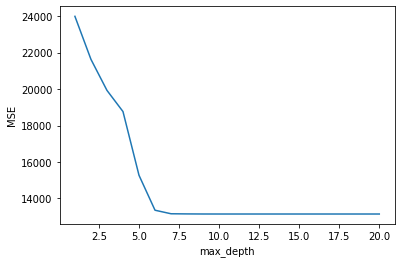

In [96]:
# Celda 5
max_depth_range = range(1, 21)
accuracy_scores = []

for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1, criterion='squared_error')
    accuracy_scores.append(cross_val_score(clf, XTotal, yTotal, cv=10, scoring='neg_mean_squared_error').mean()*(-1))

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [97]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [98]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [99]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [108]:
# Celda 6


# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []
score_max=0
i_depth=0
# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
dtc = DecisionTreeClassifier(max_depth=4, random_state=1).fit(X_train, y_train)
pred=dtc.predict(X_test)
accuracy_tree=accuracy_score(y_test,pred)
f1_tree=f1_score(y_test,pred)

print("accuracy tree")
print(accuracy_tree)
print("f1 tree")
print(f1_tree)

clf = LogisticRegression(random_state=1).fit(X_train, y_train)
pred= clf.predict(X_test)
accuracy_lr=accuracy_score(y_test,pred)
f1_lr=f1_score(y_test,pred)


print("accuracy lr")
print(accuracy_lr)
print("f1 lr")
print(f1_lr)


accuracy tree
0.6513333333333333
f1 tree
0.6345213137665969
accuracy lr
0.6146666666666667
f1 lr
0.6115591397849462


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [113]:
#  Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creación de 1300 muestras de bootstrap
n_estimators = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 modelos con las 100 muestras boostrap

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    if i<100 :
        trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
        trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    elif i<200 :
        trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
        trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    else :
        trees[i] = LogisticRegression(random_state=seeds[i])
        trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])


# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
# Desempeño al hacer votación mayoritaria
print("accuracy")
print(metrics.accuracy_score(y_pred, y_test))
print("f1")
print(metrics.f1_score(y_pred, y_test))


accuracy
0.6328282828282829
f1
0.621156852527358


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [118]:
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)


# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)


# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)


print("accuracy")
print(metrics.accuracy_score(y_pred, y_test))
print("f1")
print(metrics.f1_score(y_pred, y_test))

accuracy
0.6328282828282829
f1
0.6207616066770996


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

|          | tree   | lr     | VotMay | VotPon |
|----------|--------|--------|--------|--------|
| accuracy | 0.6513 | 0.6146 | 0.6328 | 0.6328 |
| f1       | 0.6345 | 0.6115 | 0.6211 | 0.6207 |



basado en los resutados obtenidos por los diferentes modelos, el modelo con mejor score es el arbol de decision por si sólo, el cual obtuvo un accuracy de 0.6513 y un f1 de 0.6345